In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import pandas as pd

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.linear_model import LinearRegression

In [2]:
import csv
#SAVE THE DATA
def Save_Data(data, name):
    ''' Save a list data in a .csv file '''
    out = csv.writer(open(name,'a'),delimiter=',', quoting=csv.QUOTE_ALL)
    for i in data:
        out.writerow([i])
        
#save_data(P_DE, 'calor.csv')

In [3]:
#RESTORE SAVE DATA
def Restore_data(file_name):
    ''' Restore the information .csv file in a python list '''
    data=[]
    with open(file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            data.append(float(list(row)[0]))
        #reader = csv.reader(f)
        #restored_list = list(reader)[0]
        #data = [float(i) for i in restored_list]
        return data

#heat = Restore_data('Calor.csv')

In [4]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [5]:
T_08= Restore_data('./Data/Delta_Energy_Temperature_v4_0.8.csv')

In [6]:
len(T_08)

2000000

/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


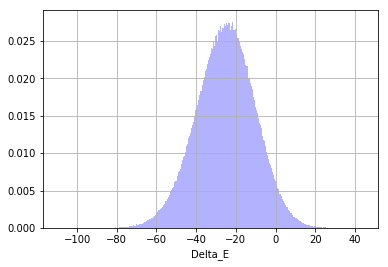

In [7]:
#heat = Restore_data('Calor.csv')
fig, ax = plt.subplots()
ax.hist(T_08, 1000, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

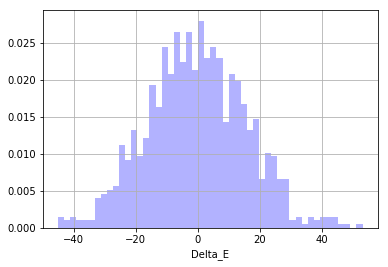

In [47]:
heat1 = Restore_data('Calor1.csv')
fig, ax = plt.subplots()
ax.hist(heat1, 50, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

In [48]:
x_grid = np.linspace(-10.0, 10.0, 10)
print(x_grid)

[-30.         -23.33333333 -16.66666667 -10.          -3.33333333
   3.33333333  10.          16.66666667  23.33333333  30.        ]


In [49]:
#SI EL NUMERO DE ELEMENTOS ES 
print(x_grid[4])
print(x_grid[5])

-3.333333333333332
3.3333333333333357


In [50]:
print(x_grid.shape)

(10,)


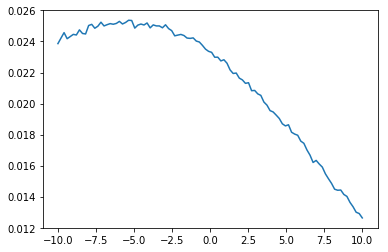

In [9]:
fig, a = plt.subplots()
x_grid = np.linspace(-10.0, 10.0, 100)
P = kde_sklearn(np.array(T_08), x_grid, bandwidth=0.2)
a.plot(x_grid, kde_sklearn(np.array(T_08), x_grid, bandwidth=0.1), label='ANTES')
plt.show()

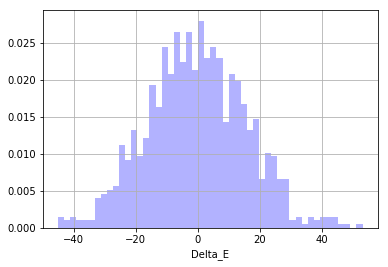

In [74]:
heat2 = Restore_data('Calor2.csv')
fig, ax = plt.subplots()
ax.hist(heat1, 50, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

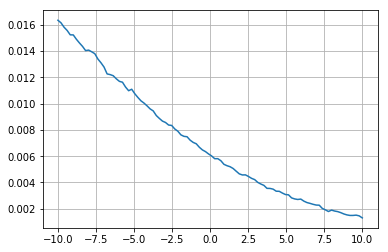

In [8]:
fig, a = plt.subplots()

DE_max =  10.0
DE_min = -10.0
partitions = 100

DE_grid = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(T_08), DE_grid, bandwidth=0.1)
a.plot(DE_grid, kde_sklearn(np.array(T_08), DE_grid, bandwidth=0.1), label='ANTES')
plt.grid(True)
plt.show()

In [12]:
lim = int(partitions/2)

T1 = 1.0
T2 = 0.8

beta1 = 1.0/T1
beta2 = 1.0/T2

P_neg_Q = P[:lim][::-1] 
P_pos_Q = P[lim:]

DE_neg_grid = DE_grid[:lim][::-1]
DE_pos_grid = DE_grid[lim:]

log_Ps = np.log(P_pos_Q/P_neg_Q)


In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid.reshape(-1, 1), log_Ps)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep

-0.25053406547974877
-0.0008890014708322624


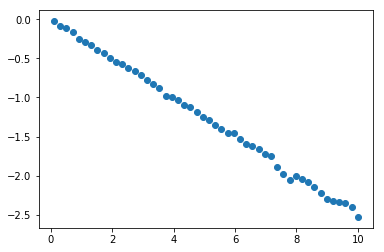

In [14]:
plt.scatter(DE_pos_grid, log_Ps)
plt.show()

In [197]:
print(DE_grid[:int(partitions/2)][::-1])

[ -0.3030303   -0.90909091  -1.51515152  -2.12121212  -2.72727273
  -3.33333333  -3.93939394  -4.54545455  -5.15151515  -5.75757576
  -6.36363636  -6.96969697  -7.57575758  -8.18181818  -8.78787879
  -9.39393939 -10.         -10.60606061 -11.21212121 -11.81818182
 -12.42424242 -13.03030303 -13.63636364 -14.24242424 -14.84848485
 -15.45454545 -16.06060606 -16.66666667 -17.27272727 -17.87878788
 -18.48484848 -19.09090909 -19.6969697  -20.3030303  -20.90909091
 -21.51515152 -22.12121212 -22.72727273 -23.33333333 -23.93939394
 -24.54545455 -25.15151515 -25.75757576 -26.36363636 -26.96969697
 -27.57575758 -28.18181818 -28.78787879 -29.39393939 -30.        ]


In [108]:
print(DE_grid[int(partitions/2):])

[ 0.3030303   0.90909091  1.51515152  2.12121212  2.72727273  3.33333333
  3.93939394  4.54545455  5.15151515  5.75757576  6.36363636  6.96969697
  7.57575758  8.18181818  8.78787879  9.39393939 10.         10.60606061
 11.21212121 11.81818182 12.42424242 13.03030303 13.63636364 14.24242424
 14.84848485 15.45454545 16.06060606 16.66666667 17.27272727 17.87878788
 18.48484848 19.09090909 19.6969697  20.3030303  20.90909091 21.51515152
 22.12121212 22.72727273 23.33333333 23.93939394 24.54545455 25.15151515
 25.75757576 26.36363636 26.96969697 27.57575758 28.18181818 28.78787879
 29.39393939 30.        ]


In [15]:
beta1-beta2

-0.25